In [90]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [91]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]

In [92]:
torch.manual_seed(42)

In [93]:
x, y = datasets.make_blobs(n_pts, random_state=42, centers=centers, cluster_std=0.4)

In [94]:
x[:10], y[:10]

(array([[ 0.68929505, -0.52913157],
        [-0.83568701,  0.37631505],
        [-0.26750849, -0.51060555],
        [-0.6916697 ,  0.42573641],
        [ 0.11012733, -0.18516616],
        [-0.17098204,  0.01166254],
        [ 0.60302016, -0.52977837],
        [ 0.22799011, -0.40709852],
        [ 0.08625951,  0.40968948],
        [-0.86320963, -0.06492148]]), array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0]))

In [95]:
def scatter_plot():
    plt.figure(figsize=(20,10))
    plt.scatter(x[:, 0], x[:, 1], c=y)

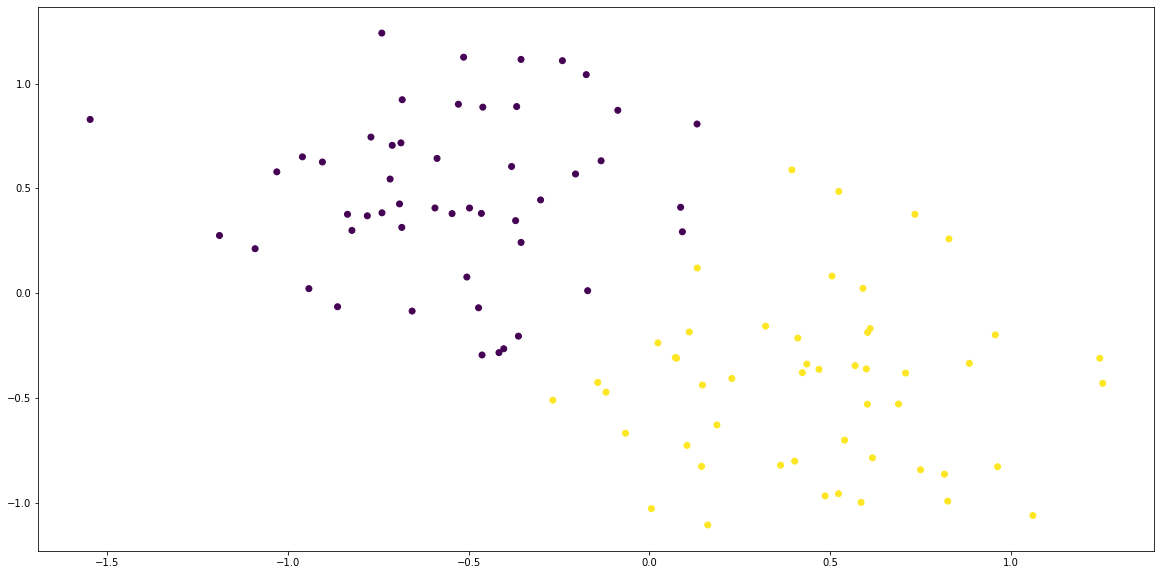

In [96]:
scatter_plot()

In [106]:
x_data = torch.tensor(x)
y_data = torch.tensor(y.reshape(n_pts, 1))

In [115]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
#         nn.init.kaiming_uniform(self.linear.weight)

    def forward(self, x):
        y_hat = torch.sigmoid(self.linear(x))
        return y_hat

In [116]:
model = Model(2, 1)

In [117]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1427, -0.3443]], requires_grad=True), Parameter containing:
 tensor([0.4153], requires_grad=True)]

In [134]:
def get_paramas():
    [w, b] = model.parameters()
    w1, w2 = w.view(2)
    b1 = b[0]
    return (w1.item(), w2.item(), b1.item())

In [135]:
def plot_fit(title):
    plt.title = title
    w1, w2, b = get_paramas()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b) / -w2
    plt.figure(figsize=(10,10))
    plt.plot(x1, x2, 'r')
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.show()
#     scatter_plot()

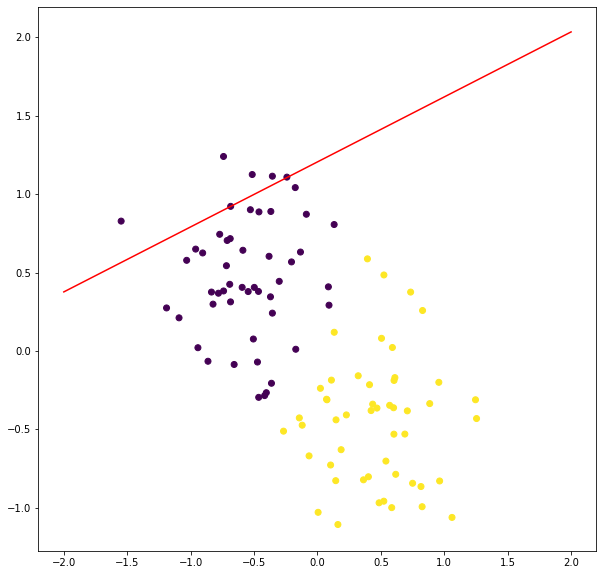

In [120]:
plot_fit("Initial model")

In [128]:
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [129]:
epochs = 2000
losses = []

for i in range(epochs):
    y_hat = model.forward(x_data.float())
    loss = criterian(y_hat, y_data.float())
#     print(f"epoch: {i}, loss: {loss.item()}.")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

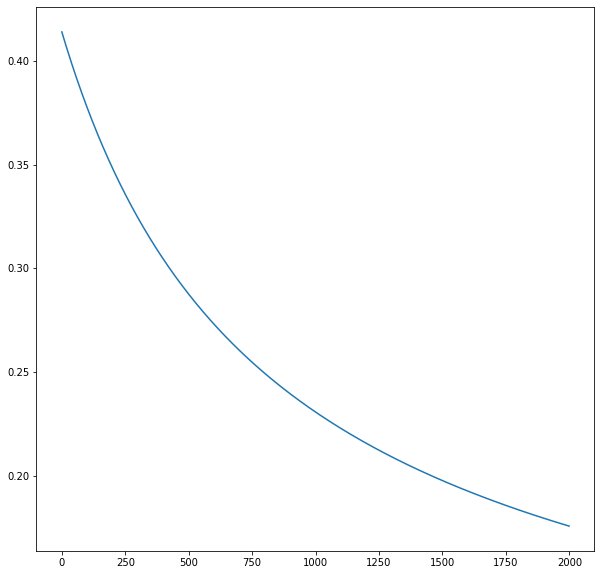

In [130]:
plt.figure(figsize=(10,10))
plt.plot(range(epochs), losses)

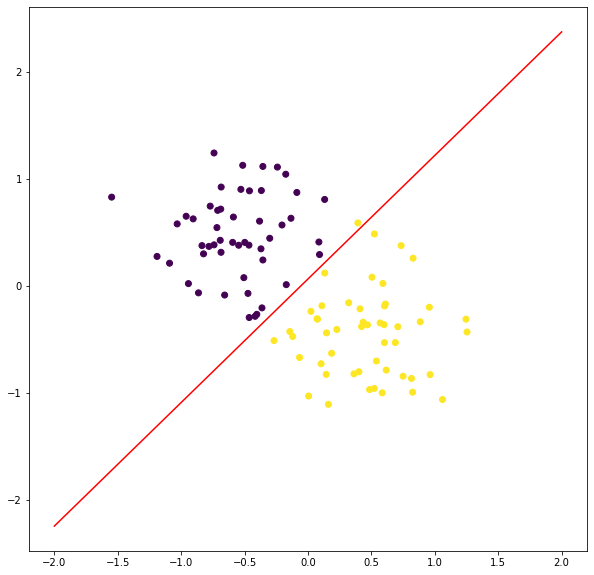

In [131]:
plot_fit("Train model")

In [139]:
model = Model(2, 1)

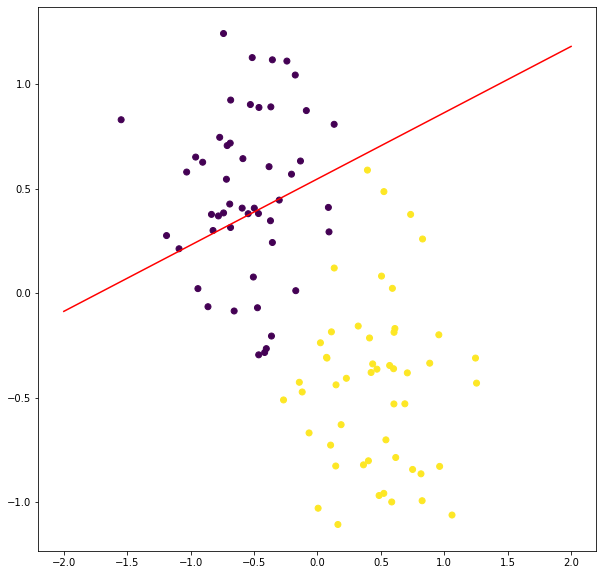

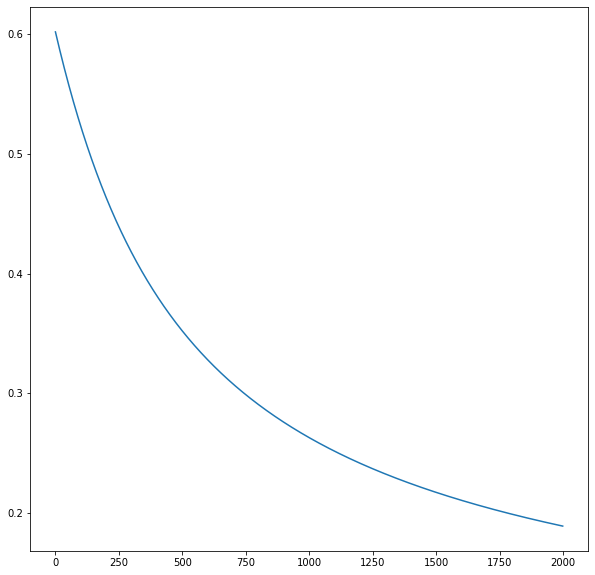

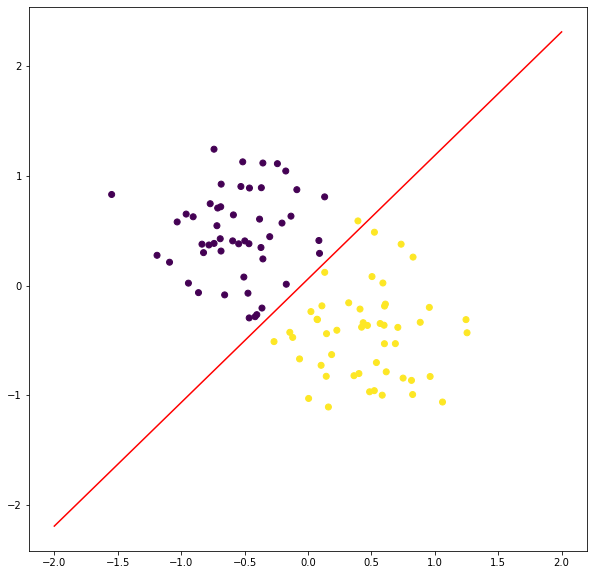

In [140]:
plot_fit("Initial model")
    
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 2000
losses = []

for i in range(epochs):
    y_hat = model.forward(x_data.float())
    loss = criterian(y_hat, y_data.float())
#     print(f"epoch: {i}, loss: {loss.item()}.")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

plt.figure(figsize=(10,10))
plt.plot(range(epochs), losses)
plt.show()

plot_fit("Train model")

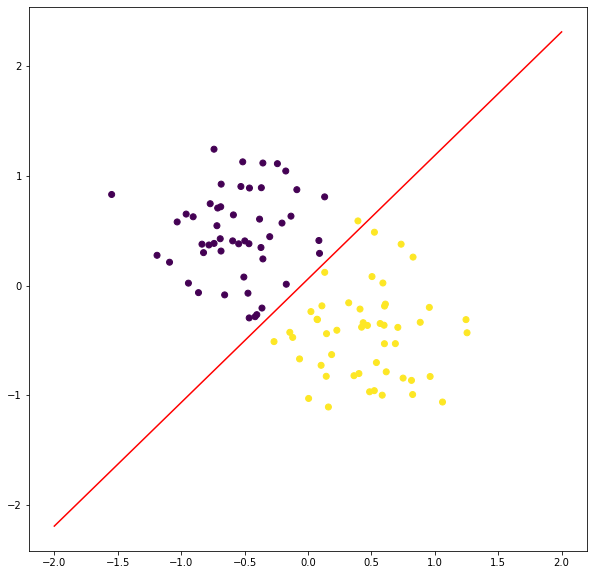

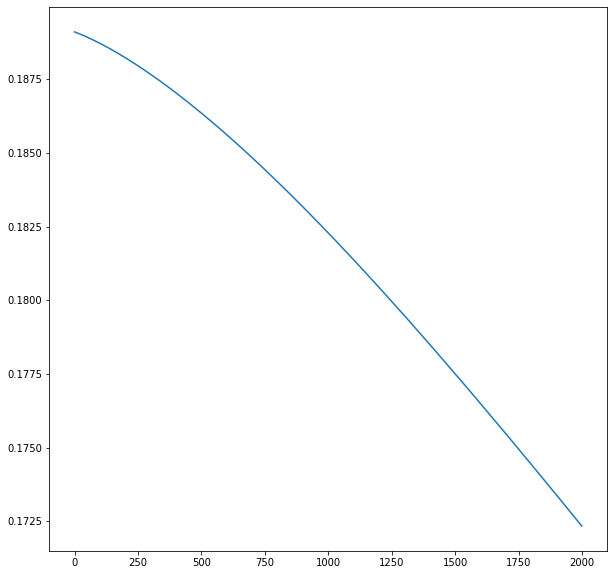

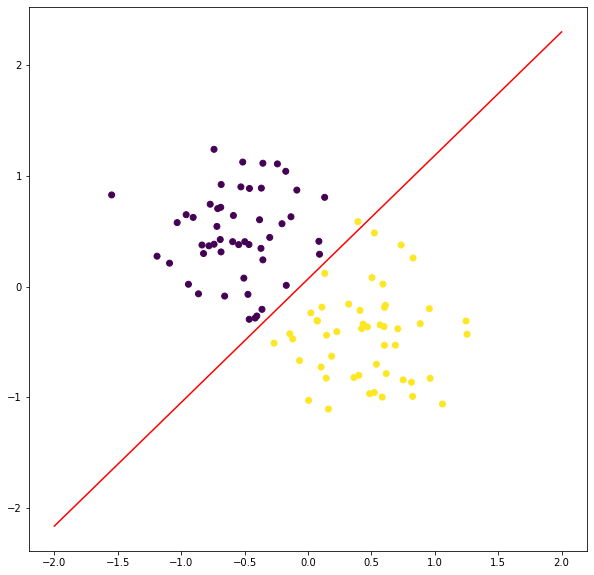

In [141]:
plot_fit("Initial model")
    
criterian = nn.BCELoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=0.01)

epochs = 2000
losses = []

for i in range(epochs):
    y_hat = model.forward(x_data.float())
    loss = criterian(y_hat, y_data.float())
#     print(f"epoch: {i}, loss: {loss.item()}.")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

plt.figure(figsize=(10,10))
plt.plot(range(epochs), losses)
plt.show()

plot_fit("Train model")

In [145]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

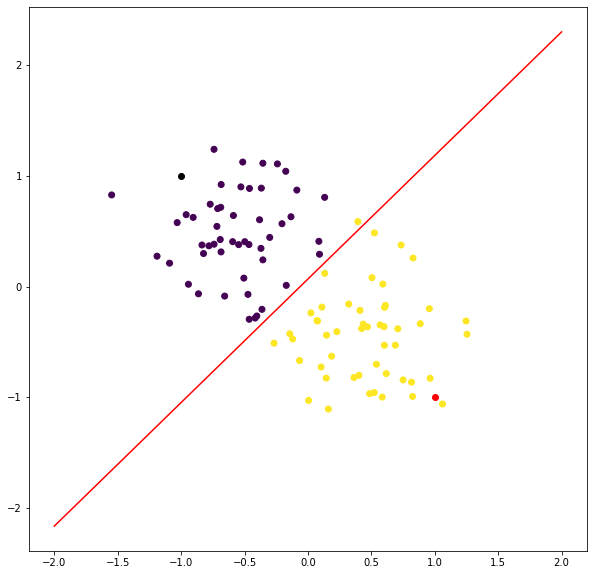

In [153]:
plt.figure(figsize=(10,10))
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
w1, w2, b = get_paramas()
x1 = np.array([-2.0, 2.0])
x2 = (w1*x1 + b) / -w2
plt.plot(x1, x2, 'r')
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [157]:
model.forward(point1).item()

0.9902644157409668

In [159]:
model(point1)

tensor([0.9903], grad_fn=<SigmoidBackward>)